# Pymaceuticals Inc.
---

### Analysis

- From the summary statistics dataFrame we can observe that the lowest means of the tumor volume are Ramicane and Capomulin, so those 2 would be our target for the study analysis.
- In the bar chart, we can confirm our initial hypothesis in which we can observe that capomulin and ramicane were the 2 drug treatments that had the most mice tested in comparison with the other treatments. This is probably due to the fact that the tumor volume mean has the lowest value (it might've been previously tested and might be the reason why the mice are getting more dosis of these two treatments than the others).
- We analysed the gender of the mice to see if there was any significant difference but they're about half and half. So we can discard that results are due to the mice gender.
- In the box plot we can observe that out of our two different treatments that we had defined as "target" to analyze, the capomulin boxplot has a smaller box which means our data is not as disperse. Also, our whiskers arent skewed (they're both, upper and lower whisker,  about the same size) so this asimilates more to a normal distribution than the ramicane one. The above explanation means our prediction is more likely to be true in capomulin than in ramicane so we will use that to analyze and predict future results.        

    -After deciding that we would analyze the capomulin treatment, we analized the tumor volume of just one mouse. As observed, the treatment volume decreases over time(Tested it several times since I used a random choice of the mouse, most mice have an observed decrease of tumor volume over time, though there are some exceptions like i557 that have the opposite reaction to the treatment. That, according to our next analysis in the scatter plot might be due to the mouse's weight). This is a good observation due to the fact that we're trying to find a treatment that decreases tumor volume, but this information is independent of our analysis and irrelevant from the future prediction point of view. (It doesn't matter if the volume increases or decreases to have a good prediction as long as we have a small SEM in the scatter plot, and the different points in the plot stay close to the regression line).

- In our scatter plot we're comparing weight and average tumor volume, we can observe that the average tumor volume, has a strong positive correlation against the weight of each mouse.      -After doing the linear regression model and testing the correlation coefficient, we can predict the average tumor volume knowing the weight of the mouse with a certainty of 84%.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df=pd.merge(study_results,mouse_metadata, how='outer', on='Mouse ID').sort_values(by=['Timepoint']).reset_index(drop=True)
# Display the data table for preview
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,w584,0,45.000000,0,Infubinol,Male,3,29
2,p136,0,45.000000,0,Zoniferol,Female,5,28
3,a411,0,45.000000,0,Ramicane,Male,3,22
4,b447,0,45.000000,0,Ceftamin,Male,2,30
...,...,...,...,...,...,...,...,...
1888,k403,45,22.050126,1,Ramicane,Male,21,16
1889,z581,45,62.754451,3,Infubinol,Female,24,25
1890,v923,45,40.658124,2,Capomulin,Female,19,21
1891,j119,45,38.125164,1,Capomulin,Female,7,23


In [2]:
# Checking the number of mice.
mice_count = mouse_study_df["Mouse ID"].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'],keep=False)]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
229,g989,0,45.000000,0,Propriva,Female,21,26
232,g989,0,45.000000,0,Propriva,Female,21,26
277,g989,5,47.570392,0,Propriva,Female,21,26
335,g989,5,48.786801,0,Propriva,Female,21,26
599,g989,10,49.880528,0,Propriva,Female,21,26
600,g989,10,51.745156,0,Propriva,Female,21,26
736,g989,15,51.325852,1,Propriva,Female,21,26
742,g989,15,53.442020,0,Propriva,Female,21,26
1080,g989,20,54.657650,1,Propriva,Female,21,26
1102,g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df=mouse_study_df.loc[mouse_study_df["Mouse ID"].isin(duplicate_mouse_ids)==False ].copy()
clean_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,w584,0,45.000000,0,Infubinol,Male,3,29
2,p136,0,45.000000,0,Zoniferol,Female,5,28
3,a411,0,45.000000,0,Ramicane,Male,3,22
4,b447,0,45.000000,0,Ceftamin,Male,2,30
...,...,...,...,...,...,...,...,...
1888,k403,45,22.050126,1,Ramicane,Male,21,16
1889,z581,45,62.754451,3,Infubinol,Female,24,25
1890,v923,45,40.658124,2,Capomulin,Female,19,21
1891,j119,45,38.125164,1,Capomulin,Female,7,23


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_study_df["Mouse ID"].nunique()
clean_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_gb=clean_study_df.groupby(["Drug Regimen"])
mean_tumor=drug_gb["Tumor Volume (mm3)"].mean()
median_tumor=drug_gb["Tumor Volume (mm3)"].median()

variance_tumor=drug_gb["Tumor Volume (mm3)"].var()
std_tumor=drug_gb["Tumor Volume (mm3)"].std()
SEM_tumor=drug_gb["Tumor Volume (mm3)"].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_summary= pd.DataFrame({"Mean Tumor Volume":mean_tumor,
                     "Median Tumor Volume":median_tumor,
                     "Tumor Volume Variance":variance_tumor,
                      "Tumor Volume Std. Dev.":std_tumor,
                     "Tumor Volume Std. Error":SEM_tumor
                    })
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

agg_functions = {'Tumor Volume (mm3)':
    ['mean', 'median', 'var', 'std', 'sem']}
  
aggregate_summary = clean_study_df.groupby(['Drug Regimen']).agg(agg_functions)
aggregate_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

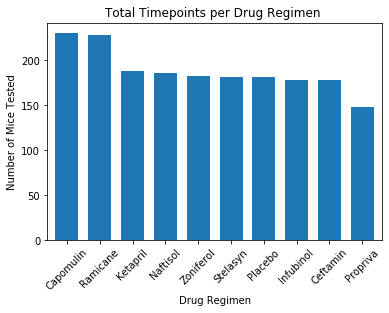

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints=drug_gb['Timepoint'].count().sort_values(ascending=False)
timepoint_chart=timepoints.plot(kind="bar",title="Total Timepoints per Drug Regimen ",rot=45,width=0.7)
# plt.xticks(rotation=30, horizontalalignment="center")
timepoint_chart.set_xlabel("Drug Regimen")
timepoint_chart.set_ylabel("Number of Mice Tested")

Text(0.5, 1.0, 'Total Timepoints per Drug Regimen ')

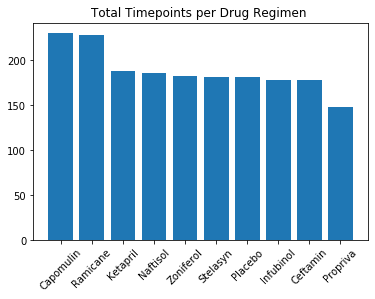

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint=clean_study_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
#convert to df for easier column handling
timepoint_df=pd.DataFrame(timepoint).reset_index()
#extract columns for plotting
drug_regimen=timepoint_df["Drug Regimen"]
mice_bar=timepoint_df["Timepoint"]
#plot
x_axis=np.arange(0,len(drug_regimen))
plt.bar(x_axis,timepoint)
tick_locations=[x for x in x_axis]
plt.xticks(tick_locations,drug_regimen,rotation=45)
plt.title("Total Timepoints per Drug Regimen ")



Text(0, 0.5, 'Gender')

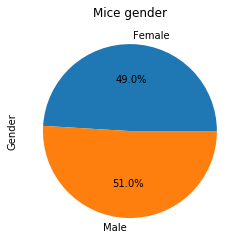

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_gb=clean_study_df.groupby(["Sex"])
sex_count=sex_gb['Mouse ID'].count()
gender_chart=sex_count.plot(kind="pie",autopct="%1.1f%%",title="Mice gender")
gender_chart.set_ylabel("Gender")


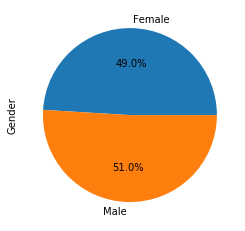

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts=clean_study_df.groupby('Sex')['Mouse ID'].count()
plt.pie(gender_counts,labels=gender_counts.index.values,autopct="%1.1f%%")
plt.ylabel("Gender")
plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_study_df.groupby(["Mouse ID"])['Timepoint'].max()

max_tumor = max_tumor.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_tumor.merge(clean_study_df,on=['Mouse ID','Timepoint'],how="left")
# merge_df=merge_df.rename(columns={"Tumor Volume (mm3)_y":"Final Tumor Volume (mm3)",
#                                   "Tumor Volume (mm3)_x":"Tumor Volume (mm3)"})
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for-loop (and later for plot labels)

drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (FOR PLOTTING)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    # Locate the rows which contain what drug each mice is on and get the final tumor volumes
    final_vol=merged_df.loc[merged_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    #append to empty list (for plotting)
    tumor_vol_list.append(final_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_vol.loc[(final_vol < lower_bound) | (final_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


#     tumor_vol_list ///tried this to make sure I was doing the list correctly


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


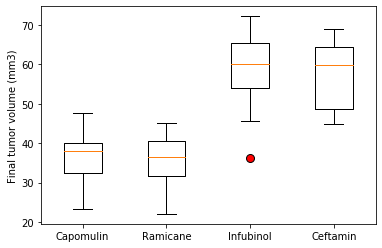

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='red', markersize=8,
                  linestyle='none')
ax1.boxplot(tumor_vol_list,flierprops=flierprops)
ax1.set_xticklabels(drug_list)
ax1.set_ylabel("Final tumor volume (mm3)")
plt.show()

## Line and Scatter Plots

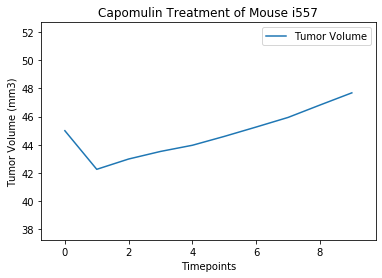

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df=clean_study_df[(clean_study_df["Drug Regimen"]=="Capomulin")]
options=capomulin_df["Mouse ID"]
chosen_mouse=np.random.choice(options)
line_df=capomulin_df.loc[capomulin_df["Mouse ID"] == chosen_mouse,["Mouse ID","Timepoint","Tumor Volume (mm3)"]] 
timepoints_line=line_df["Timepoint"]

x_axis=np.arange(0,len(timepoints_line))
y_axis=line_df["Tumor Volume (mm3)"]

plt.plot(x_axis,y_axis,label="Tumor Volume")
plt.legend(loc='best')
plt.title(f"Capomulin Treatment of Mouse {chosen_mouse}")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-0.75,len(x_axis)-.25)
plt.ylim(min(y_axis)-5,max(y_axis)+5)
plt.grid
plt.show()

# line_df



In [35]:
#printed filtered DF with just mice that got capomulin treatment for reference in next cells
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
149,w914,0,45.000000,0,Capomulin,Male,24,21
151,v923,0,45.000000,0,Capomulin,Female,19,21
153,j119,0,45.000000,0,Capomulin,Female,7,23
158,u364,0,45.000000,0,Capomulin,Male,18,17
...,...,...,...,...,...,...,...,...
1867,r944,45,41.581521,2,Capomulin,Male,12,25
1877,u364,45,31.023923,3,Capomulin,Male,18,17
1890,v923,45,40.658124,2,Capomulin,Female,19,21
1891,j119,45,38.125164,1,Capomulin,Female,7,23


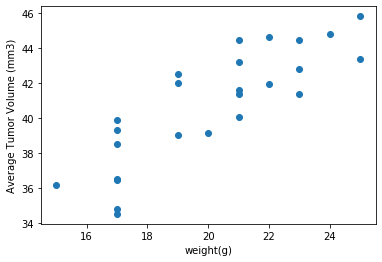

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_av_vol=capomulin_df.groupby(["Mouse ID"]).mean().reset_index()

plt.scatter(tumor_av_vol.iloc[:,5],tumor_av_vol.iloc[:,2])
plt.xlabel("weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

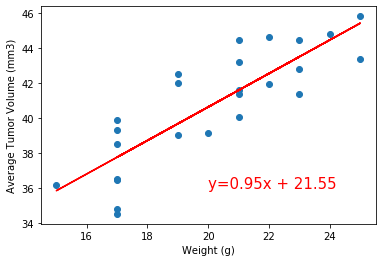

The corrilation between weighy and average tumor volume is 0.84


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values_tumor = tumor_av_vol.iloc[:,5]
y_values_tumor = tumor_av_vol.iloc[:,2]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values_tumor,y_values_tumor)
regress_values = x_values_tumor * slope + intercept
line_eq="y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_tumor,y_values_tumor)
plt.plot(x_values_tumor,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"The corrilation between weighy and average tumor volume is \
{round(st.pearsonr(x_values_tumor,y_values_tumor)[0],2)}")